# EqualWidthBinning: Feature Demonstration

This notebook demonstrates the key features of the `EqualWidthBinning` class from the binlearn library.

## Key Features Covered:
- Basic binning with different configurations
- Working with pandas DataFrames and numpy arrays
- Sklearn pipeline integration
- Parameter serialization and reconstruction
- Edge case handling

## Overview
`EqualWidthBinning` divides feature ranges into bins of equal width, making it ideal for:
- **Uniform data distributions**
- **Fast processing needs**
- **Interpretable bin boundaries**
- **Feature engineering pipelines**

## 1. Setup and Data Preparation

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from binlearn.methods import EqualWidthBinning
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [5]:
# Create sample datasets
n_samples = 200

# 1. Pandas DataFrame with mixed distributions
data = pd.DataFrame({
    'uniform': np.random.uniform(0, 100, n_samples),
    'normal': np.random.normal(50, 15, n_samples),
    'skewed': np.random.exponential(2, n_samples)
})

# 2. NumPy array
array_data = np.random.randn(n_samples, 2) * [10, 20] + [0, 50]

# 3. Classification dataset for pipeline demo
X_class, y_class = make_classification(
    n_samples=n_samples, 
    n_features=3, 
    n_informative=2, 
    n_redundant=1, 
    n_repeated=0,
    n_classes=2, 
    random_state=42
)
X_features = pd.DataFrame(X_class, columns=['feature_1', 'feature_2', 'feature_3'])

print(f"📊 Created datasets:")
print(f"   - Mixed data: {data.shape}")
print(f"   - Array data: {array_data.shape}")
print(f"   - Classification: {X_features.shape}")
print("\n📈 Data preview:")
print(data.describe().round(2))

📊 Created datasets:
   - Mixed data: (200, 3)
   - Array data: (200, 2)
   - Classification: (200, 3)

📈 Data preview:
       uniform  normal  skewed
count   200.00  200.00  200.00
mean     49.80   51.55    2.03
std      30.11   15.61    2.15
min       0.64    6.56    0.02
25%      22.04   40.90    0.53
50%      51.26   51.37    1.36
75%      75.41   62.77    2.82
max      99.71   88.70   11.43


## 2. Basic Binning Operations

In [ ]:
# Basic usage with different bin counts
print("🎯 Basic EqualWidthBinning Demonstration")
print("=" * 40)

# Test with different bin configurations
for n_bins in [3, 5, 7]:
    print(f"\n📊 Using {n_bins} bins:")
    
    # Create and fit binner
    binner = EqualWidthBinning(n_bins=n_bins)
    binner.fit(data[['uniform', 'normal']])
    
    # Transform data
    binned = binner.transform(data[['uniform', 'normal']])
    
    print(f"   Bin edges (uniform): {np.round(binner.bin_edges_['uniform'], 1)}")
    print(f"   Bin edges (normal): {np.round(binner.bin_edges_['normal'], 1)}")
    print(f"   Unique bins created: {len(np.unique(binned))}")

# Demonstrate with numpy arrays
print(f"\n🔢 NumPy Array Support:")
binner_array = EqualWidthBinning(n_bins=4)
binner_array.fit(array_data)
binned_array = binner_array.transform(array_data)
print(f"   Array shape: {array_data.shape} → {binned_array.shape}")
print(f"   Unique values: {len(np.unique(binned_array))}")

🎯 Basic EqualWidthBinning Demonstration

📊 Using 3 bins:
   Bin edges (uniform): [ 0.6 33.7 66.7 99.7]
   Bin edges (normal): [ 6.6 33.9 61.3 88.7]
   Unique bins created: 3

📊 Using 5 bins:
   Bin edges (uniform): [ 0.6 20.5 40.3 60.1 79.9 99.7]
   Bin edges (normal): [ 6.6 23.  39.4 55.8 72.3 88.7]
   Unique bins created: 5

📊 Using 7 bins:
   Bin edges (uniform): [ 0.6 14.8 28.9 43.1 57.3 71.4 85.6 99.7]
   Bin edges (normal): [ 6.6 18.3 30.  41.8 53.5 65.2 77.  88.7]
   Unique bins created: 7

🔢 NumPy Array Support:
   Array shape: (200, 2) → (200, 2)
   Unique values: 4


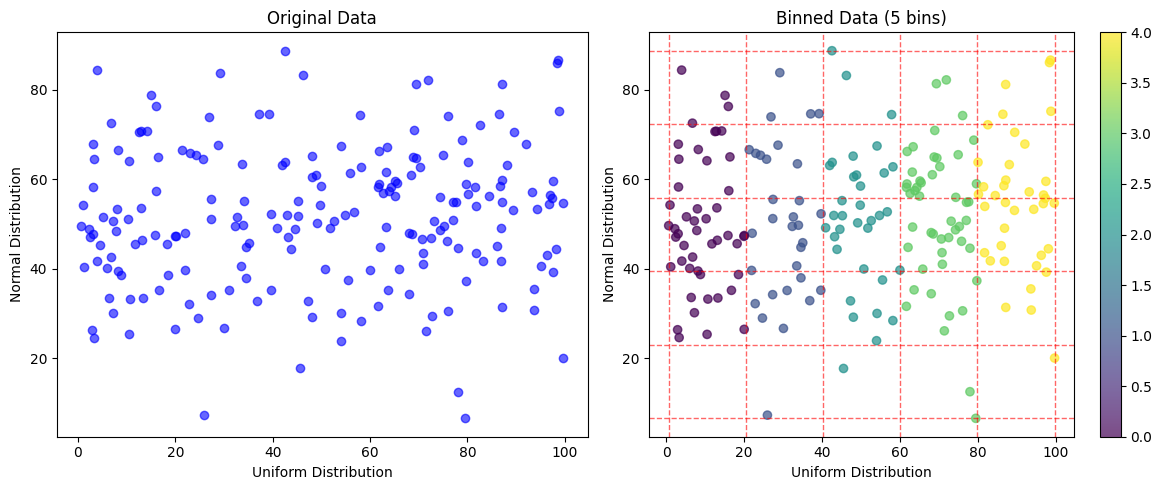

In [7]:
# Visualize binning results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original data
ax1.scatter(data['uniform'], data['normal'], alpha=0.6, color='blue')
ax1.set_title('Original Data')
ax1.set_xlabel('Uniform Distribution')
ax1.set_ylabel('Normal Distribution')

# Binned data with boundaries
binner = EqualWidthBinning(n_bins=5)
binner.fit(data[['uniform', 'normal']])
binned = binner.transform(data[['uniform', 'normal']])

scatter = ax2.scatter(data['uniform'], data['normal'], c=binned[:, 0], 
                     cmap='viridis', alpha=0.7)

# Add bin boundaries
for edge in binner.bin_edges_['uniform']:
    ax2.axvline(edge, linestyle='--', alpha=0.6, color='red', linewidth=1)
for edge in binner.bin_edges_['normal']:
    ax2.axhline(edge, linestyle='--', alpha=0.6, color='red', linewidth=1)

ax2.set_title('Binned Data (5 bins)')
ax2.set_xlabel('Uniform Distribution')
ax2.set_ylabel('Normal Distribution')
plt.colorbar(scatter, ax=ax2)

plt.tight_layout()
plt.show()

## 3. Sklearn Pipeline Integration

In [ ]:
# Demonstrate pipeline integration
print("🔗 Sklearn Pipeline Integration")
print("=" * 35)

# Split data for classification
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_class, test_size=0.3, random_state=42
)

# Create pipeline with binning and classification
pipeline = Pipeline([
    ('binner', EqualWidthBinning(n_bins=5)),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = (y_pred == y_test).mean()

print(f"✅ Pipeline trained successfully")
print(f"📊 Test accuracy: {accuracy:.3f}")
print(f"🔢 Features binned: {X_train.shape[1]}")

# Show bin edges from pipeline
binner_from_pipeline = pipeline.named_steps['binner']
print(f"\n📏 Bin edges created:")
for i, (col, edges) in enumerate(binner_from_pipeline.bin_edges_.items()):
    print(f"   {col}: {np.round(edges, 2)}")

🔗 Sklearn Pipeline Integration
✅ Pipeline trained successfully
📊 Test accuracy: 0.817
🔢 Features binned: 3

📏 Bin edges created:
   feature_1: [-2.9  -1.73 -0.57  0.59  1.75  2.92]
   feature_2: [-3.09 -1.67 -0.26  1.15  2.56  3.97]
   feature_3: [-3.01 -2.09 -1.17 -0.25  0.67  1.59]


## 4. Parameter Serialization and Reconstruction

In [9]:
# Demonstrate serialization for model persistence
print("💾 Parameter Serialization & Reconstruction")
print("=" * 45)

# Create and fit original binner
original_binner = EqualWidthBinning(n_bins=6)
original_binner.fit(data)
original_result = original_binner.transform(data)

# Serialize parameters
params = original_binner.get_params()
print(f"📋 Serialized parameters: {params}")

# Reconstruct binner from parameters
reconstructed_binner = EqualWidthBinning(**params)
reconstructed_binner.bin_edges_ = original_binner.bin_edges_.copy()

# Test reconstruction
reconstructed_result = reconstructed_binner.transform(data)
results_match = np.allclose(original_result, reconstructed_result)

print(f"\n🔍 Reconstruction verification:")
print(f"   ✅ Results identical: {results_match}")
print(f"   📊 Original shape: {original_result.shape}")
print(f"   📊 Reconstructed shape: {reconstructed_result.shape}")

# Test with new data
test_data = pd.DataFrame({
    'uniform': np.random.uniform(-10, 110, 50),
    'normal': np.random.normal(50, 20, 50),
    'skewed': np.random.exponential(3, 50)
})

test_result = reconstructed_binner.transform(test_data)
print(f"\n🔄 Transform new data without refitting:")
print(f"   ✅ Success: {test_result.shape}")
print(f"   🔢 Unique bins: {len(np.unique(test_result))}")

💾 Parameter Serialization & Reconstruction
📋 Serialized parameters: {'bin_edges': {'uniform': [0.638587171683358, 17.150897645697984, 33.66320811971261, 50.17551859372723, 66.68782906774186, 83.20013954175649, 99.71245001577111], 'normal': [6.556169327094658, 20.246081116714677, 33.93599290633469, 47.62590469595471, 61.31581648557473, 75.00572827519474, 88.69564006481477], 'skewed': [0.022185120043067726, 1.9227808956358683, 3.8233766712286688, 5.7239724468214686, 7.624568222414269, 9.52516399800707, 11.42575977359987]}, 'bin_range': None, 'bin_representatives': {'uniform': [8.894742408690671, 25.407052882705294, 41.91936335671992, 58.431673830734546, 74.94398430474916, 91.4562947787638], 'normal': [13.401125221904667, 27.091037011524683, 40.7809488011447, 54.470860590764715, 68.16077238038474, 81.85068417000475], 'skewed': [0.9724830078394681, 2.8730787834322684, 4.773674559025069, 6.674270334617869, 8.57486611021067, 10.475461885803469]}, 'clip': True, 'fit_jointly': False, 'n_bins':

## 5. Edge Cases and Robustness

In [10]:
# Test edge cases
print("⚠️ Edge Case Testing")
print("=" * 25)

edge_cases = {
    'Constant values': pd.DataFrame({'const': np.full(100, 42.0)}),
    'Single value': pd.DataFrame({'single': [1.0]}),
    'Small range': pd.DataFrame({'small': np.random.uniform(0.001, 0.002, 100)}),
    'Large values': pd.DataFrame({'large': np.random.exponential(1000, 100)})
}

for case_name, case_data in edge_cases.items():
    print(f"\n🧪 Testing: {case_name}")
    try:
        binner = EqualWidthBinning(n_bins=5)
        binner.fit(case_data)
        result = binner.transform(case_data)
        
        print(f"   ✅ Success: {result.shape}")
        print(f"   📊 Unique bins: {len(np.unique(result))}")
        print(f"   📏 Range: [{case_data.iloc[:, 0].min():.6f}, {case_data.iloc[:, 0].max():.6f}]")
        
    except Exception as e:
        print(f"   ❌ Failed: {str(e)}")

⚠️ Edge Case Testing

🧪 Testing: Constant values
   ✅ Success: (100, 1)
   📊 Unique bins: 1
   📏 Range: [42.000000, 42.000000]

🧪 Testing: Single value
   ✅ Success: (1, 1)
   📊 Unique bins: 1
   📏 Range: [1.000000, 1.000000]

🧪 Testing: Small range
   ✅ Success: (100, 1)
   📊 Unique bins: 5
   📏 Range: [0.001009, 0.001998]

🧪 Testing: Large values
   ✅ Success: (100, 1)
   📊 Unique bins: 5
   📏 Range: [0.134702, 3862.333968]


## 6. Summary and Best Practices

In [11]:
# Summary and recommendations
print("📝 EqualWidthBinning Summary")
print("=" * 35)

recommendations = {
    "✅ Best for": [
        "Uniform or near-uniform distributions",
        "Fast preprocessing pipelines",
        "Interpretable bin boundaries",
        "Feature engineering workflows"
    ],
    "⚠️ Use with caution": [
        "Highly skewed distributions",
        "Data with many outliers",
        "When equal sample sizes per bin are needed"
    ],
    "💡 Tips": [
        "Start with 5-10 bins for most use cases",
        "Use get_params() for model persistence",
        "Combine with sklearn pipelines for robust workflows",
        "Handle constant features appropriately"
    ]
}

for category, items in recommendations.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  • {item}")

print(f"\n🎯 Key Features Demonstrated:")
features = [
    "Basic binning with multiple configurations",
    "Support for pandas DataFrames and numpy arrays", 
    "Seamless sklearn pipeline integration",
    "Parameter serialization and model reconstruction",
    "Robust handling of edge cases"
]

for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

print(f"\n✨ EqualWidthBinning demonstration complete!")

📝 EqualWidthBinning Summary

✅ Best for:
  • Uniform or near-uniform distributions
  • Fast preprocessing pipelines
  • Interpretable bin boundaries
  • Feature engineering workflows

⚠️ Use with caution:
  • Highly skewed distributions
  • Data with many outliers
  • When equal sample sizes per bin are needed

💡 Tips:
  • Start with 5-10 bins for most use cases
  • Use get_params() for model persistence
  • Combine with sklearn pipelines for robust workflows
  • Handle constant features appropriately

🎯 Key Features Demonstrated:
  1. Basic binning with multiple configurations
  2. Support for pandas DataFrames and numpy arrays
  3. Seamless sklearn pipeline integration
  4. Parameter serialization and model reconstruction
  5. Robust handling of edge cases

✨ EqualWidthBinning demonstration complete!
